In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# read 데이터
df = pd.read_csv('weatherFinal.CSV', encoding="cp949")
df.head()
'''
전체 출력문
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

'''

c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


"\n전체 출력문\nwith pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also\n    print(df)\n\n"

In [88]:
df = df[df.IRR != "Y"] # 부정기 없애기 
df = df[df.CNL != "Y"]

# 비행기 취소와 관련된 Column 삭제
df.drop(columns=['CNL', 'CNR'], axis=1, inplace=True)

# 사용되지 않을 것 같은 데이터 일단 삭제
df.drop(columns=['REG', 'IRR'], axis=1, inplace=True)

# 딜레이 이유 (나중에 쓰일 듯)
df.drop(columns=['DRR'], axis=1, inplace=True)

############# 날씨 데이터 추가 후 주석 제거할 것.
# 날씨 관련 안쓰는 feature 삭제
df.drop(columns=['rain', 'weatherCode'], axis=1, inplace=True)


In [89]:
# ATT (actual time data)가 널 값인 레코드 삭제
df = df[pd.notnull(df['ATT'])]
df.isnull().sum()

Unnamed: 0    0
AOD           0
ARP           0
ATT           0
DAY           0
DLY           0
FLO           0
FLT           0
Fri           0
Mon           0
Month         0
ODP           0
SAT           0
STT           0
Sun           0
Thu           0
Tue           0
Wed           0
Year          0
cloudTotal    0
dew           0
hpa           0
hum           0
seeHpa        0
temp          0
visible       0
windSpeed     0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958150 entries, 0 to 987708
Data columns (total 27 columns):
Unnamed: 0    958150 non-null int64
AOD           958150 non-null object
ARP           958150 non-null object
ATT           958150 non-null object
DAY           958150 non-null int64
DLY           958150 non-null object
FLO           958150 non-null object
FLT           958150 non-null object
Fri           958150 non-null int64
Mon           958150 non-null int64
Month         958150 non-null int64
ODP           958150 non-null object
SAT           958150 non-null int64
STT           958150 non-null object
Sun           958150 non-null int64
Thu           958150 non-null int64
Tue           958150 non-null int64
Wed           958150 non-null int64
Year          958150 non-null int64
cloudTotal    958150 non-null float64
dew           958150 non-null float64
hpa           958150 non-null float64
hum           958150 non-null float64
seeHpa        958150 non-null float64
temp   

In [5]:
# df['SDT_YY'] = df['SDT_YY'].astype('object')
# df['SDT_MM'] = df['SDT_MM'].astype('object')
# df['SDT_DD'] = df['SDT_DD'].astype('object')

In [90]:
# ARP와 ODP가 같은 데이터 --> Wrong data => 삭제
df.drop(df[df['ARP'] == df['ODP']].index, inplace=True)


In [91]:
#--------------- fog 모델 돌리기 --------------

## INPUT : 'temp', 'hum', 'dew', 'windSpeed' 4가지 Column의 DataFrame
from sklearn.preprocessing import MinMaxScaler

def fogPreProcessing (df):
    # 비어있는 값 0으로 대체
    #print(df.isnull().sum())
    df.fillna(0, inplace = True)
  
    # MinMaxScaling
    scaler = MinMaxScaler()
    df[['hum', 'dew','temp','windSpeed']] = scaler.fit_transform(df[['hum', 'dew','temp','windSpeed']])
  
    return df



In [92]:
df.head()

,Unnamed: 0,AOD,ARP,ATT,DAY,DLY,FLO,FLT,Fri,Mon,...,Wed,Year,cloudTotal,dew,hpa,hum,seeHpa,temp,visible,windSpeed
0,0,D,ARP1,6:18,1,N,A,A1901,0,0,...,0,2017,3.0,-5.7,1029.0,80.0,1027.4,-2.5,250.0,1.543333
1,1,D,ARP1,6:25,1,N,A,A1905,0,0,...,0,2017,3.0,-5.7,1029.0,80.0,1027.4,-2.5,250.0,1.543333
2,2,D,ARP1,6:30,1,N,L,L1751,0,0,...,0,2017,3.0,-5.7,1029.0,80.0,1027.4,-2.5,250.0,1.543333
3,3,D,ARP1,6:34,1,N,F,F1201,0,0,...,0,2017,3.0,-5.7,1029.0,80.0,1027.4,-2.5,250.0,1.543333
4,4,D,ARP1,6:38,1,N,H,H1101,0,0,...,0,2017,3.0,-5.7,1029.0,80.0,1027.4,-2.5,250.0,1.543333


In [93]:
fog = df[["temp","hum","dew","windSpeed"]]

fog = fogPreProcessing(fog)

c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3493: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pan

In [94]:
import pickle
from sklearn.externals import joblib

# 저장된 모델 불러오기
clf_from_joblib = joblib.load('fogmodel.pkl') 

# 저장된 모델로 예측하기
#clf_from_joblib.predict(fog)

In [95]:
# 예측할 때 확률로가져오기!
result = clf_from_joblib.predict_proba(fog)

fog_column = []

# fog_column에 확률값 저장
for i in result:
    fog_column.append(i[1])
    
print("fog_column :",len(fog_column))

fog_column : 958150


In [96]:
df['fog'] = fog_column

df.drop(columns=['hum', 'dew','temp','windSpeed'], axis=1, inplace=True)
df.head()
#------------------------------------------------------------

,Unnamed: 0,AOD,ARP,ATT,DAY,DLY,FLO,FLT,Fri,Mon,...,Sun,Thu,Tue,Wed,Year,cloudTotal,hpa,seeHpa,visible,fog
0,0,D,ARP1,6:18,1,N,A,A1901,0,0,...,1,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187
1,1,D,ARP1,6:25,1,N,A,A1905,0,0,...,1,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187
2,2,D,ARP1,6:30,1,N,L,L1751,0,0,...,1,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187
3,3,D,ARP1,6:34,1,N,F,F1201,0,0,...,1,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187
4,4,D,ARP1,6:38,1,N,H,H1101,0,0,...,1,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187


In [13]:
#------------연결지연 시도--------------------------
df123 = df.copy()
df123['AIR'] = (df123['FLT']).str[1:4]
df123.loc[df123['AOD'] == 'D', 'TEMP'] = df123['ODP'] + '-' + df123['AOD'] + '-' + df123['ATT']
df123.loc[df123['AOD'] == 'A', 'TEMP'] = df123['ARP'] + '-' + df123['AOD'] + '-' + df123['ATT']


In [14]:

# df123['TEMP2'] = pd.to_datetime(df['ATT'],format= '%H:%M')
# df123 = df123.sort_values(['AIR','FLO','DAY','TEMP2']).reset_index(drop=True)
# df123.drop(['SDT_DY','STT','ATT','ARP','ODP','FLO'], axis = 1, inplace=True)
# df123['ABNORMAL'] = False

# df234 = df123.iloc[0:0]

# # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
# #     print(df123.head(10000))

# ab = 'A'
# for i, row in df123.iterrows():
#     if row['AOD'] == ab:
#         row.ABNORMAL = True
#     df234.append(row)
#     ab = row['AOD']
    
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df123.head(100))

# #------------------------------------------------

In [97]:
# ARP 경로 파생변수 생성
df['ARPODP'] = df['ARP'] + '_' + df['ODP']
df.head()

,Unnamed: 0,AOD,ARP,ATT,DAY,DLY,FLO,FLT,Fri,Mon,...,Thu,Tue,Wed,Year,cloudTotal,hpa,seeHpa,visible,fog,ARPODP
0,0,D,ARP1,6:18,1,N,A,A1901,0,0,...,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187,ARP1_ARP3
1,1,D,ARP1,6:25,1,N,A,A1905,0,0,...,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187,ARP1_ARP3
2,2,D,ARP1,6:30,1,N,L,L1751,0,0,...,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187,ARP1_ARP3
3,3,D,ARP1,6:34,1,N,F,F1201,0,0,...,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187,ARP1_ARP3
4,4,D,ARP1,6:38,1,N,H,H1101,0,0,...,0,0,0,2017,3.0,1029.0,1027.4,250.0,0.94187,ARP1_ARP3


In [98]:
from datetime import datetime, date

df['Diff'] = (pd.to_datetime(df['ATT'],format= '%H:%M') - pd.to_datetime(df['STT'],format= '%H:%M')).dt.seconds.astype('int64')

# STT와 ATT 격차 큰 순대로 정렬
df = df.sort_values(by=['Diff'], ascending=False)

########################################################################출발
# 딜레이가 최대 5시간이라고 가정했을 때, --> 즉, 2시간 초과한 딜레이는 wrong값이라 가정
max_delay_hour = 5
max_delay = max_delay_hour * 3600 # seconds

# 출발비행기의 경우, 조금이라도 출발이 빠른 건 wrong data라 판단.
# 7200보다 큰 값을 가지는 Diff 데이터 wrong 값 처리
df = df[((df['Diff'] <= max_delay) & (df['AOD']=='D')) | (df['AOD']=='A')]

df.head(100)

########################################################################도착
#이정도는 늦게 도착해도 O
#2시간은 예상보다 늦게도착할 수 있다. 그 이상은 말이안된다
max_delay_hour_arr = 5
max_delay_arr = max_delay_hour_arr * 3600 # seconds

#몇분 일찍도착해도 O
#30분은 예상보다 빨리도착할 수 있음. 그거보다 빨리도착하는 건 말이 안됨
min_delay = 30*60
min_delay = 86400 - min_delay  # 86400(24시간)보다 위인거만 살려놓기
df = df[(df['AOD']=='D') |((df['Diff'] <= max_delay_arr) & (df['AOD']=='A')) | ((df['AOD']=='A')& (df['Diff'] >= min_delay )) ]
df.loc[df['Diff'] >=min_delay, 'Diff'] = df.loc[df['Diff'] >=min_delay, 'Diff']  - 86400
df.head(100)

,Unnamed: 0,AOD,ARP,ATT,DAY,DLY,FLO,FLT,Fri,Mon,...,Tue,Wed,Year,cloudTotal,hpa,seeHpa,visible,fog,ARPODP,Diff
922989,922989,A,ARP6,14:29,9,N,J,J1957,0,0,...,0,0,2018,1.0,1028.6,1036.0,2000.0,0.000630,ARP6_ARP3,-60
730747,730747,A,ARP9,13:29,13,N,A,A1733,0,0,...,0,0,2018,2.0,1006.6,1005.3,1000.0,0.042415,ARP9_ARP1,-60
297523,297523,A,ARP1,9:29,24,N,I,I1306,1,0,...,0,0,2019,0.0,1011.4,1010.3,1000.0,0.004541,ARP1_ARP3,-60
586248,586248,A,ARP3,15:19,28,N,J,J1956,1,0,...,0,0,2018,4.0,1014.5,1011.4,1000.0,0.134279,ARP3_ARP6,-60
555561,555561,A,ARP3,19:19,21,N,F,F1227,0,0,...,0,0,2018,5.0,1007.4,1004.3,700.0,0.014231,ARP3_ARP1,-60
679511,679511,A,ARP3,12:04,6,N,J,J1808,0,1,...,0,0,2019,5.0,1017.8,1014.6,1000.0,0.298829,ARP3_ARP4,-60
312244,312244,A,ARP3,19:14,4,N,J,J1240,0,0,...,0,1,2017,6.0,1023.7,1020.4,500.0,0.787051,ARP3_ARP1,-60
811409,811409,A,ARP6,8:59,6,N,F,F1706,0,1,...,0,0,2017,0.0,1013.8,1021.1,1890.0,0.354253,ARP6_ARP3,-60
59185,59185,A,ARP1,10:34,19,N,A,A1972,0,1,...,0,0,2017,7.0,1010.9,1009.4,500.0,0.016352,ARP1_ARP3,-60
555551,555551,A,ARP3,18:54,21,N,A,A1147,0,0,...,0,0,2018,5.0,1007.2,1004.1,600.0,0.014559,ARP3_ARP8,-60


In [17]:
# # Check the numerical data
# numerical_feature = [col for col in df.columns if df[col].dtypes == 'int64']

# print(numerical_feature)

# def dist_box(df, feature_list):
#     for col in feature_list:
#         plt.figure(figsize=(15, 5))
#         sns.distplot(df.loc[df[col].notnull(), col])
#         plt.title(col)
#         plt.show()
        
#         df[col].plot(kind='box', color='red')
#         plt.show()
        
# print('*'*50)
# print('All')
# dist_box(df, numerical_feature)
# print('*'*50)
# print('Arrive')
# dist_box(df[df['AOD'] == 'A'], numerical_feature)
# print('*'*50)
# print('Departure')
# dist_box(df[df['AOD'] == 'D'], numerical_feature)

In [99]:
# 시간에서 시 데이터만 추출 ==> 분은 영향을 줄임.
#df['ATT'] = pd.to_datetime(df['ATT'],format= '%H:%M').dt.hour
#df['STT'] = pd.to_datetime(df['STT'],format= '%H:%M').dt.hour

df['ATT']= (pd.to_datetime(df['ATT'],format= '%H:%M').dt.hour).astype(str) + (pd.to_datetime(df['ATT'],format= '%H:%M').dt.minute).astype(str)
df['time']= (pd.to_datetime(df['STT'],format= '%H:%M').dt.hour).astype(str) + (pd.to_datetime(df['STT'],format= '%H:%M').dt.minute).astype(str)

############ 잠시 삭제
# 일단 FLT는 처리할 방법이 없어서 삭제해놓음
df.drop(['FLT'], axis=1, inplace = True)
#날짜 년, 일 제거
df.drop(['DAY'], axis=1, inplace = True)

df.drop(['ATT','STT','Diff'], axis = 1, inplace=True)


In [100]:
df['time']= df['time'].astype('int')
#df['time']
#df['STT'] = pd.to_datetime(df['STT'],format= '%H:%M').dt.hour

In [20]:
# Categorical data --> one hot encoding

def one_hot_dummies(df, *args):
    for col in args:
        one_hot_col = pd.get_dummies(df[col])
        new_col = [col + '_' + str(s) for s in one_hot_col.columns]
        one_hot_col.columns = new_col
        df = df.drop([col], axis = 1)
        df = df.join(one_hot_col)

    return df

df = one_hot_dummies(df, 'ARPODP')



In [21]:
df.head()

,Unnamed: 0,AOD,ARP,DLY,FLO,Fri,Mon,Month,ODP,SAT,...,ARPODP_ARP4_ARP15,ARPODP_ARP4_ARP3,ARPODP_ARP5_ARP1,ARPODP_ARP5_ARP3,ARPODP_ARP6_ARP3,ARPODP_ARP7_ARP3,ARPODP_ARP8_ARP1,ARPODP_ARP8_ARP3,ARPODP_ARP9_ARP1,ARPODP_ARP9_ARP3
922989,922989,A,ARP6,N,J,0,0,12,ARP3,0,...,0,0,0,0,1,0,0,0,0,0
730747,730747,A,ARP9,N,A,0,0,5,ARP1,0,...,0,0,0,0,0,0,0,0,1,0
297523,297523,A,ARP1,N,I,1,0,5,ARP3,0,...,0,0,0,0,0,0,0,0,0,0
586248,586248,A,ARP3,N,J,1,0,9,ARP6,0,...,0,0,0,0,0,0,0,0,0,0
555561,555561,A,ARP3,N,F,0,0,7,ARP1,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956338 entries, 922989 to 619231
Data columns (total 62 columns):
Unnamed: 0           956338 non-null int64
AOD                  956338 non-null object
ARP                  956338 non-null object
DLY                  956338 non-null object
FLO                  956338 non-null object
Fri                  956338 non-null int64
Mon                  956338 non-null int64
Month                956338 non-null int64
ODP                  956338 non-null object
SAT                  956338 non-null int64
STT                  956338 non-null int64
Sun                  956338 non-null int64
Thu                  956338 non-null int64
Tue                  956338 non-null int64
Wed                  956338 non-null int64
Year                 956338 non-null int64
cloudTotal           956338 non-null float64
hpa                  956338 non-null float64
seeHpa               956338 non-null float64
visible              956338 non-null float64
fog        

In [101]:
# Target 레이블링

from sklearn import preprocessing
# DLY도 1과 0으로 데이터 처리
le = preprocessing.LabelEncoder()
df[['DLY']] = le.fit_transform(df[['DLY']])
df[['ARP']] = le.fit_transform(df[['ARP']])
df[['ODP']] = le.fit_transform(df[['ODP']])
df[['FLO']] = le.fit_transform(df[['FLO']])

df[['ARPODP']] = le.fit_transform(df[['ARPODP']])

c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
df.head()

,Unnamed: 0,AOD,ARP,DLY,FLO,Fri,Mon,Month,ODP,SAT,...,ARPODP_ARP4_ARP15,ARPODP_ARP4_ARP3,ARPODP_ARP5_ARP1,ARPODP_ARP5_ARP3,ARPODP_ARP6_ARP3,ARPODP_ARP7_ARP3,ARPODP_ARP8_ARP1,ARPODP_ARP8_ARP3,ARPODP_ARP9_ARP1,ARPODP_ARP9_ARP3
922989,922989,A,10,0,5,0,0,12,7,0,...,0,0,0,0,1,0,0,0,0,0
730747,730747,A,13,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,1,0
297523,297523,A,0,0,4,1,0,5,7,0,...,0,0,0,0,0,0,0,0,0,0
586248,586248,A,7,0,5,1,0,9,10,0,...,0,0,0,0,0,0,0,0,0,0
555561,555561,A,7,0,2,0,0,7,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956338 entries, 922989 to 619231
Data columns (total 62 columns):
Unnamed: 0           956338 non-null int64
AOD                  956338 non-null object
ARP                  956338 non-null int32
DLY                  956338 non-null int32
FLO                  956338 non-null int32
Fri                  956338 non-null int64
Mon                  956338 non-null int64
Month                956338 non-null int64
ODP                  956338 non-null int32
SAT                  956338 non-null int64
STT                  956338 non-null int64
Sun                  956338 non-null int64
Thu                  956338 non-null int64
Tue                  956338 non-null int64
Wed                  956338 non-null int64
Year                 956338 non-null int64
cloudTotal           956338 non-null float64
hpa                  956338 non-null float64
seeHpa               956338 non-null float64
visible              956338 non-null float64
fog            

In [102]:
# 도착, 출발 데이터 분리
df=df.drop(columns=['Unnamed: 0'])
df_A = df[df['AOD']=='A']
df_D = df[df['AOD']=='D']

# AOD column삭제 
df_A = df_A.drop(['AOD'],axis = 1)
df_D = df_D.drop(['AOD'],axis = 1)

df_A.head(5)

,ARP,DLY,FLO,Fri,Mon,Month,ODP,SAT,Sun,Thu,Tue,Wed,Year,cloudTotal,hpa,seeHpa,visible,fog,ARPODP,time
922989,10,0,5,0,0,12,7,0,1,0,0,0,2018,1.0,1028.6,1036.0,2000.0,0.000630,34,1430
730747,13,0,0,0,0,5,0,0,1,0,0,0,2018,2.0,1006.6,1005.3,1000.0,0.042415,38,1330
297523,0,0,4,1,0,5,7,0,0,0,0,0,2019,0.0,1011.4,1010.3,1000.0,0.004541,10,930
586248,7,0,5,1,0,9,10,0,0,0,0,0,2018,4.0,1014.5,1011.4,1000.0,0.134279,25,1520
555561,7,0,2,0,0,7,0,1,0,0,0,0,2018,5.0,1007.4,1004.3,700.0,0.014231,18,1920


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956338 entries, 922989 to 619231
Data columns (total 61 columns):
AOD                  956338 non-null object
ARP                  956338 non-null int32
DLY                  956338 non-null int32
FLO                  956338 non-null int32
Fri                  956338 non-null int64
Mon                  956338 non-null int64
Month                956338 non-null int64
ODP                  956338 non-null int32
SAT                  956338 non-null int64
STT                  956338 non-null int64
Sun                  956338 non-null int64
Thu                  956338 non-null int64
Tue                  956338 non-null int64
Wed                  956338 non-null int64
Year                 956338 non-null int64
cloudTotal           956338 non-null float64
hpa                  956338 non-null float64
seeHpa               956338 non-null float64
visible              956338 non-null float64
fog                  956338 non-null float64
time         

In [103]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [104]:
def makeTestSet(df):
    X = df.drop(['DLY'], axis = 1)
    y = df['DLY']
        
    X_tr, X_t, y_tr, y_t = train_test_split(X,y, test_size= 0.3, random_state = 42)
    
    print("X_train set--------------------")
    print("Shape:",X_tr.shape)
    print("Target:")
    print(y_tr.value_counts())
    print()
      
    print("X_test set info-----------------")
    print("Shape:",X_t.shape)
    print("Target:")
    print(y_t.value_counts())
    print()

    return [X_tr, X_t, y_tr, y_t]

X_train_A, X_test_A, y_train_A, y_test_A = makeTestSet(df_A)
X_train_D, X_test_D, y_train_D, y_test_D = makeTestSet(df_D)

X_train set--------------------
Shape: (334954, 19)
Target:
0    312690
1     22264
Name: DLY, dtype: int64

X_test set info-----------------
Shape: (143553, 19)
Target:
0    134013
1      9540
Name: DLY, dtype: int64

X_train set--------------------
Shape: (334481, 19)
Target:
0    275913
1     58568
Name: DLY, dtype: int64

X_test set info-----------------
Shape: (143350, 19)
Target:
0    118180
1     25170
Name: DLY, dtype: int64



In [105]:
############# 날씨 데이터 추가 후 주석 제거할 것.

# scaler - weather data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['time']] = scaler.fit_transform(df[['time']])


In [54]:
df.isnull().sum()

AOD                 0
ARP                 0
DLY                 0
FLO                 0
Fri                 0
                   ..
ARPODP_ARP7_ARP3    0
ARPODP_ARP8_ARP1    0
ARPODP_ARP8_ARP3    0
ARPODP_ARP9_ARP1    0
ARPODP_ARP9_ARP3    0
Length: 61, dtype: int64

In [55]:
print(df[df['visible']==0])


       AOD  ARP  DLY  FLO  Fri  Mon  Month  ODP  SAT  STT  ...  \
839895   A    2    0    5    0    0      8    0    0    7  ...   
863948   A    6    0    1    0    0      4    0    0   15  ...   
917827   A   10    0    2    0    1      7    7    0   19  ...   
841902   A    3    0    2    0    0      8    7    1   10  ...   
863947   A    6    0    5    0    0      4    0    0   15  ...   
839879   A    2    0    5    0    0      8    0    1   19  ...   
915972   A   10    0    2    0    0      5    7    0   19  ...   
940136   A    3    0    5    0    0      6    7    0   14  ...   
863949   D    6    1    3    0    0      4    7    0   15  ...   
918838   D   10    1    4    0    0      8    7    0   19  ...   
863946   A    6    1    3    0    0      4    7    0   15  ...   
863945   D    6    0    1    0    0      4    0    0   15  ...   
915971   D   10    0    4    0    0      5    7    0   19  ...   
739012   D    2    0    5    0    0      7    0    0    8  ...   
939107   D

In [56]:
df['time']

922989    0.606189
730747    0.563798
297523    0.394235
586248    0.644341
555561    0.813904
            ...   
23406     0.447223
128374    0.697329
564513    0.816024
397845    0.616787
619231    0.525646
Name: time, Length: 956338, dtype: float64

In [57]:
# --------------변수 중요도 확인하고 상위 OO개 남기기 -------------------

def feature_importance(X_train, y_train, X_test, y_test):
        
    #### Skew Data처리할거면 주석 해제하기!!
    #X_train, y_train = imbalance(X_train, y_train)
    
    
    log_rg = LogisticRegression().fit(X_train, y_train)
    cross_val_score(log_rg, X_train, y_train, cv=5)
    log_rg.score(X_test, y_test)
    print(classification_report(y_test, log_rg.predict(X_test)))

    # X column 개수 출력
    #print(len(X.columns)) 

    # 변수 중요도 
    fi = pd.DataFrame(zip(X_train.columns.values, abs(log_rg.coef_.ravel())))
    fi.columns = ['feature', 'coef']
    fi.sort_values("coef", ascending=False, inplace=True)
    fi = fi.reset_index().drop(['index'], axis=1)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(fi)

    for index, val in enumerate(fi.iloc[:, 1]):
        if val < 0.1:
            X_train.drop([fi.iloc[index, 0]], axis = 1, inplace = True)
            X_test.drop([fi.iloc[index, 0]], axis = 1, inplace = True)   
    return

feature_importance(X_train_A, y_train_A, X_test_A, y_test_A)
feature_importance(X_train_D, y_train_D, X_test_D, y_test_D)
print(len(X_train_A.columns))
print(len(X_test_A.columns))
print(len(X_train_D.columns))
print(len(X_test_D.columns))

#--------------------------------------------------------------------

c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parksoyoung\appdata\local\p

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    134013
           1       0.00      0.00      0.00      9540

    accuracy                           0.93    143553
   macro avg       0.47      0.50      0.48    143553
weighted avg       0.87      0.93      0.90    143553

              feature      coef
0                 Fri  0.184098
1                 SAT  0.183985
2    ARPODP_ARP3_ARP1  0.130422
3    ARPODP_ARP1_ARP3  0.118974
4    ARPODP_ARP2_ARP3  0.114872
5                 Tue  0.089685
6                 Mon  0.081361
7    ARPODP_ARP1_ARP2  0.080092
8                 STT  0.071953
9                 Thu  0.069779
10               time  0.062268
11   ARPODP_ARP5_ARP1  0.059932
12   ARPODP_ARP1_ARP5  0.048318
13         cloudTotal  0.048222
14   ARPODP_ARP2_ARP1  0.048126
15   ARPODP_ARP4_ARP3  0.047346
16  ARPODP_ARP15_ARP2  0.046646
17                Wed  0.040285
18   ARPODP_ARP9_ARP1  0.037528
19   ARPODP_ARP6_ARP3  0.037074
2

c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parksoyoung\appdata\local\p

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    118180
           1       0.50      0.00      0.00     25170

    accuracy                           0.82    143350
   macro avg       0.66      0.50      0.45    143350
weighted avg       0.77      0.82      0.75    143350

              feature      coef
0    ARPODP_ARP3_ARP1  0.568795
1    ARPODP_ARP3_ARP2  0.550655
2   ARPODP_ARP15_ARP2  0.516315
3    ARPODP_ARP5_ARP1  0.513482
4    ARPODP_ARP1_ARP5  0.410327
5    ARPODP_ARP9_ARP1  0.341614
6   ARPODP_ARP13_ARP3  0.307830
7    ARPODP_ARP9_ARP3  0.307259
8    ARPODP_ARP3_ARP8  0.304904
9    ARPODP_ARP3_ARP6  0.282958
10   ARPODP_ARP1_ARP9  0.281193
11                Fri  0.268551
12  ARPODP_ARP2_ARP15  0.249356
13   ARPODP_ARP5_ARP3  0.241132
14   ARPODP_ARP2_ARP3  0.235776
15   ARPODP_ARP1_ARP2  0.205266
16  ARPODP_ARP3_ARP13  0.203708
17                SAT  0.198682
18   ARPODP_ARP3_ARP7  0.194132
19   ARPODP_ARP1_ARP3  0.183034
2

In [58]:
def imbalance (X_train, y_train):

    # 모델설정
    sm = SMOTE(ratio='auto', kind='regular')

    # train데이터를 넣어 복제함
    X_resampled, y_resampled = sm.fit_sample(X_train,list(y_train))

    print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))
    
    return [X_resampled, y_resampled]

In [59]:
# Under sampling 부분 --> 사용시 runModel의 주석을 풀어 사용해야함.

from imblearn.under_sampling import *
def under_sampling(X_train, y_train):
    X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_sample(X_train, y_train)
    X_resampled = pd.DataFrame(X_resampled)
    X_resampled.columns = X_train_D.columns
    y_resampled = pd.DataFrame(y_resampled)

    return X_resampled, y_resampled

In [60]:
from imblearn.under_sampling import ClusterCentroids # doctest: +NORMALIZE_WHITESPACE
from imblearn.under_sampling import EditedNearestNeighbours # doctest: +NORMALIZE_WHITESPACE

def another_under_sampling(X_train, y_train):
    sampler = EditedNearestNeighbours(ratio={0:40000, 1:20000})
    X_train, y_train = sampler.fit_resample(X_train, y_train)

In [106]:
# ROC Curve그리기
def plot_roc_curve(fpr, tpr):
    
    
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [107]:
def confusion_matrix_heatmap(y_true, y_pred):
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [63]:
# grid Search를 통한 하이퍼 파라미터 최적화 부분 --> 아직 적용하지 않음.
# Colab을 통해 적용에 문제가 없나 실험중에 있음. 

def optimizationPrams():
    param_grid = { 
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
    }
    rfc=RandomForestClassifier(random_state=42)

    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

    return CV_rfc

In [69]:
def randomsearch_xgboost(X_train, y_train, X_test, y_test):
    param_distributions={'max_depth': sp.stats.randint(3, 7),
                        'min_child_weight' : sp.stats.randint(1,10),
                        'learning_rate': sp.stats.uniform(0.05 ,  0.2), 
                        'subsample': sp.stats.uniform(0.25, 1.0),
                        'colsample_bytree': sp.stats.uniform(0.25, 1.0)
                        }
    xgb_model = XGBClassifier()
    rs = RandomizedSearchCV(xgb_model,
                            param_distributions,
                            cv=10,
                            n_iter=200,
                            scoring="f1",
                            n_jobs=1,
                            verbose=2)
    rs.fit(X_train, y_train.ravel())
    return rs
    # predict = rs.predict(test_X)
    # best score 뽑아야함
    # return predict[:, 1] 

In [108]:
def runModel (X_train, y_train, X_test, y_test, base = True):
    
    #X_train, y_train = under_sampling(X_train, y_train)
    
    
    
    models = []
    
    if base ==True:
          models.append(('XGB', XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                        silent=True, nthread=1,subsample=1.0,min_child_weight=5,max_depth=5,gamma=5,colsample_bytree=0.6)))
    else:
#         models.append(('LR', LogisticRegression()))
#         models.append(('LDA', LinearDiscriminantAnalysis()))
#         models.append(('KNN', KNeighborsClassifier()))
#         models.append(('CART', DecisionTreeClassifier()))
#         models.append(('NB', GaussianNB()))
        models.append(('RF', RandomForestClassifier(max_depth=4, n_estimators=100, random_state=0)))
#         models.append(('SVM', SVC(gamma='auto')))
#         models.append(('XGB', XGBClassifier()))

    
    # 평가
    results = []
    names = []
    scoring = 'recall'

    seed = 7
    for name, model in models:
        # K-Fold
#         kfold = KFold(n_splits=10, random_state=seed)
#         cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#         results.append(cv_results)
#         names.append(name)
#         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#         print(msg)

        # Hold out 
        model.fit(X_train, y_train)
        y_predict = pd.Series(model.predict(X_test))

        # Resets index to compare original test data with predicted data
        y_test = y_test.reset_index(drop=True)
        y_predict = y_predict.reset_index(drop=True)

#         plt.figure(figsize=(15, 5))
#         plt.scatter(range(y_test.shape[0]), y_test, c='gray')
#         plt.scatter(range(y_predict.shape[0]), y_predict , c='r')
#         diff = abs(y_test - y_predict)
#         plt.bar(range(diff.shape[0]), diff, color='gray')
#         plt.title('Result - Original comparsion')
#         plt.legend(['Original', 'Predict'])
#         plt.show()

        print(model.score(X_test, y_test))
        print('-' * 50)
        
        #--------ROC Curve-----------------
        probs = model.predict_proba(X_test)
        probs = probs[:, 1]
        auc = roc_auc_score(y_test, probs)
        print('AUC: %.2f' % auc)
        
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        plot_roc_curve(fpr, tpr)
        #-----------------------------------
        
        #-------- Confusion matrix heatmap -----------------
        confusion_matrix_heatmap(y_test, y_predict)
        print(classification_report(y_test, y_predict))
        #-----------------------------------
        
             
#      # boxplot algorithm comparison
#     fig = plt.figure(figsize=(11,6))
#     fig.suptitle('Algorithm Comparison')
#     ax = fig.add_subplot(111)
#     plt.boxplot(results)
#     ax.set_xticklabels(names)
#     plt.show()
    
    return

In [66]:
X_train_D, y_train_D = imbalance(X_train_D, y_train_D)
X_train_A, y_train_A = imbalance(X_train_A, y_train_A)


After OverSampling, the shape of train_X: (551826, 31)
After OverSampling, the shape of train_y: (551826, 31) 

After OverSampling, counts of label '1': 275913
After OverSampling, counts of label '0': 275913
After OverSampling, the shape of train_X: (625380, 5)
After OverSampling, the shape of train_y: (625380, 5) 

After OverSampling, counts of label '1': 312690
After OverSampling, counts of label '0': 312690


In [67]:
import scipy as sp
rs = randomsearch_xgboost(X_train_D, y_train_D, X_test_D, y_test_D)

print(rs.best_params_)
print(rs.best_score_)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966, total=  53.7s
[CV] colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.6s remaining:    0.0s


[CV]  colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966, total=  53.1s
[CV] colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966 
[CV]  colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966, total=  53.0s
[CV] colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966 
[CV]  colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966, total=  53.1s
[CV] colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=8, subsample=0.4404765788792966 
[CV]  colsample_bytree=0.27078672217352384, learning_rate=0.22309751161246494, max_depth=5, min_child_weight=

c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


XGBoostError: value 1.12402 for Parameter subsample exceed bound [0,1]

In [ ]:
df.info()

0.9341776208090392
--------------------------------------------------
AUC: 0.75


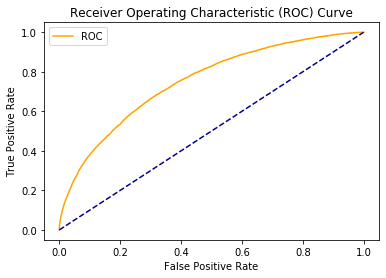

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    134013
           1       0.75      0.01      0.03      9540

    accuracy                           0.93    143553
   macro avg       0.84      0.51      0.50    143553
weighted avg       0.92      0.93      0.90    143553



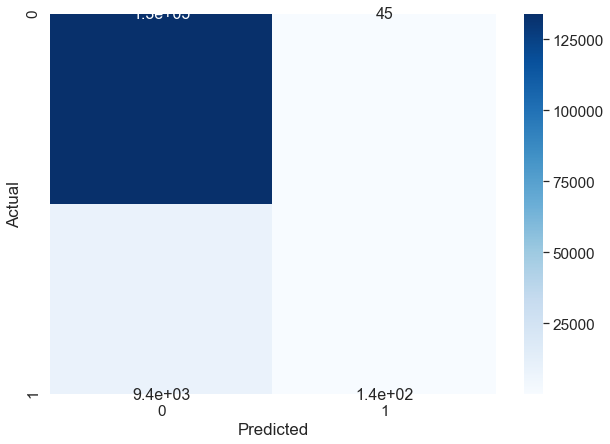

In [109]:
# True면 base algorithm만 실행하겠다 (base algorithm : Random Forest)
# False면 모든 알고리즘을 실행하겠다.
runModel (X_train_A,y_train_A, X_test_A, y_test_A, True)